In [0]:
from google.colab import drive
drive.mount('/content/driver')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/driver


In [0]:
!ls "/content/driver/My Drive"

'Adhar card.jpg'		      flickr8k_text
'AI syllabus set 2.zip'		      Flickr8k_text
 cdn.02f-converted.pdf		      flickr_train.txt
'Colab Notebooks'		     'Getting started.pdf'
 d407ebe0db9a11e9.zip		     'GIRIDHAR RESUME (1).docx'
 Data.pdf			      giri.jpg
'Data_Resume (10).docx'		     'image_sequence (2).p'
'Data_Resume (11).docx'		      inception_train_new.p
'Data_Resume (1).docx'		      inceptionv3_test.p
'Data_Resume (2).docx'		      inceptionv3_train.p
'Data_Resume (3).docx'		     'INDIA ML HIRING HACKATHON (1).docx'
'Data_Resume (4).docx'		     'INDIA ML HIRING HACKATHON.docx'
'Data_Resume (5).docx'		     'ml_.zip (Unzipped Files)'
'Data_Resume (6).docx'		     'ml_.zip (Unzipped Files) (1)'
'Data_Resume (7).docx'		     'Msc Mark list Sem 1.pdf'
'Data_Resume (8).docx'		     'Msc Mark list sem 2.pdf'
'Data_Resume (9).docx'		     'Msc Resume (1).docx'
'Data_Resume-converted (1) (1).pdf'  'Msc Resume (2).docx'
'Data_Resume-converted (1) (2).pdf'  'Msc Resume.docx'
'Data_Resume-conve

In [0]:
!unzip -q "/content/driver/My Drive/flicker8k-dataset.zip"

In [0]:
cd /content/driver/My Drive/Flickr8k_text

/content/driver/My Drive/Flickr8k_text


In [0]:
cd /content/driver/My Drive/Flickr8k_Dataset

/content/driver/My Drive/Flickr8k_Dataset


In [0]:
ls

final_full.csv  Flicker8k_Dataset/


In [0]:
#/content/driver/My Drive/flickr8k_text//content/driver/My Drive/flickr8k_text/Flickr8k.token.txt.txt
flikr_full = '/content/Flickr8k_text/Flickr8k.token.txt'
flikr_test = '/content/Flickr8k_text/Flickr_8k.testImages.txt'

flikr_train = '/content/Flickr8k_text/Flickr_8k.trainImages.txt'
flikr_valid = '/content/Flickr8k_text/Flickr_8k.devImages.txt'

In [0]:
images = '/content/Flickr8k_Dataset/Flicker8k_Dataset/'
print(len(images))

44


In [0]:
import glob

Using glob take all images in the file and append them into a single list

In [0]:
img_files = glob.glob(images+'*.jpg')

In [0]:
img_files[:3]

[]

In [0]:
from PIL import Image

In [0]:
len(img_files)

8091

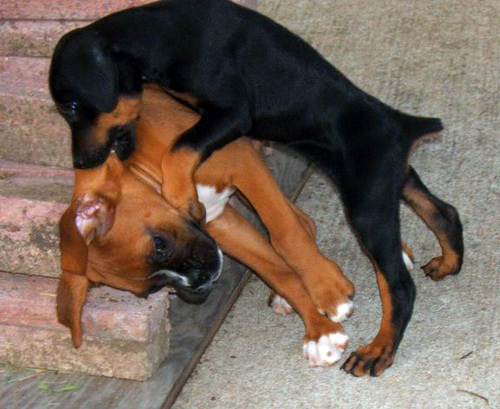

In [0]:
Image.open(img_files[2])

In [0]:
file_flikr_full = open(flikr_full,'r').read().strip().split('\n')

In [0]:
len(file_flikr_full)

40460

In [0]:
file_flikr_full[:5]

['1000268201_693b08cb0e.jpg#0\tA child in a pink dress is climbing up a set of stairs in an entry way .',
 '1000268201_693b08cb0e.jpg#1\tA girl going into a wooden building .',
 '1000268201_693b08cb0e.jpg#2\tA little girl climbing into a wooden playhouse .',
 '1000268201_693b08cb0e.jpg#3\tA little girl climbing the stairs to her playhouse .',
 '1000268201_693b08cb0e.jpg#4\tA little girl in a pink dress going into a wooden cabin .']

In [0]:
def dictionary(captions):
  d = {}
  for i, row in enumerate(captions):
      row = row.split('\t')
      row[0] = row[0][:len(row[0])-2]
      if row[0] in d:
          d[row[0]].append(row[1])
      else:
          d[row[0]] = [row[1]]
  return d

In [0]:
dic = dictionary(file_flikr_full)

NameError: ignored

In [0]:
dic['2095444126_201ff9f222.jpg']

['A dog is shaking off water .',
 'A dog shakes his head .',
 'A dog shakes off water',
 'A dog shakes off water and gets contorted .',
 'The dog is shaking water off of his body .']

In [0]:
file_flikr_train = open(flikr_train,'r').read().strip().split('\n')
file_flikr_test = open(flikr_test,'r').read().strip().split('\n')
file_flikr_valid = open(flikr_valid,'r').read().strip().split('\n')

In [0]:
def split_data(file):
  temp = []
  for i in img_files:
    if i[len(images):] in file:
      temp.append(i)
  return temp

In [0]:
train = split_data(file_flikr_train)

In [0]:
len(train)

6000

In [0]:
test = split_data(file_flikr_test)
len(test)

1000

In [0]:
valid = split_data(file_flikr_valid)
len(valid)

1000

In [0]:
test[:3]

['/content/Flickr8k_Dataset/Flicker8k_Dataset/758921886_55a351dd67.jpg',
 '/content/Flickr8k_Dataset/Flicker8k_Dataset/3121521593_18f0ec14f7.jpg',
 '/content/Flickr8k_Dataset/Flicker8k_Dataset/506738508_327efdf9c3.jpg']

In [0]:
import cv2
import matplotlib.pyplot as plt

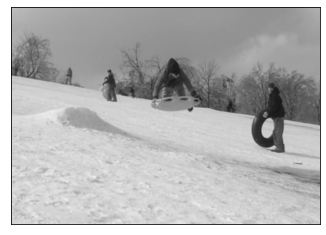

In [0]:
h = cv2.imread(test[0],0)
plt.imshow(h, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]),plt.yticks([])
plt.show()

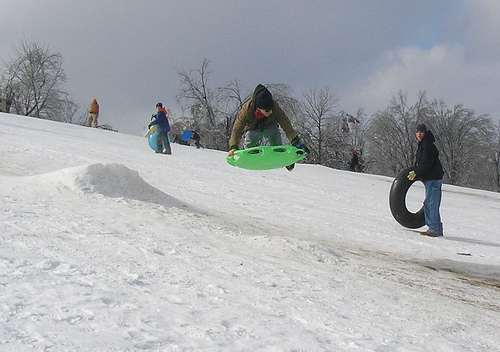

In [0]:
Image.open(test[0])

# New **Section**
# Pre Processing Images


In [0]:
from keras.applications.vgg16 import VGG16

Using TensorFlow backend.


In [0]:
import numpy as np
from keras.preprocessing import image

In [0]:
def preprocess_input(image):
  image /=255
  image -=0.5
  return image

In [0]:
def preprocessing(image_path):
  image_file = image.load_img(image_path,target_size=(299,299))
  img = image.img_to_array(image_file)
  img = np.expand_dims(img, axis=0)
  x = preprocess_input(img)
  return x

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 298.5, 298.5, -0.5)

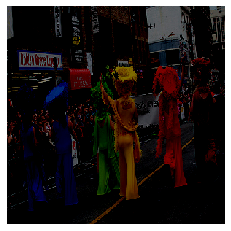

In [0]:
plt.imshow(np.squeeze(preprocessing(train[0])))
plt.axis('off')

In [0]:
from pickle import dump

In [0]:
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3

In [0]:
preprocessing(train[0]).shape

(1, 299, 299, 3)

In [0]:
model = InceptionV3(weights='imagenet')














96116736/96112376 [==============================] - 7s 0us/step


In [0]:
new_input = model.input
hidden_layer = model.layers[-2].output

In [0]:
new_model = Model(new_input,hidden_layer)

In [0]:
new_model.predict(preprocessing(train[0])).shape

(1, 2048)

In [0]:
def encode(image):
  image = preprocessing(image)
  file = new_model.predict(image)
  output = file.reshape(2048,)
  return output

In [0]:
from tqdm import tqdm

In [0]:
len(valid)

1000

In [0]:
with open('inception_valid.p','wb') as encoded_pickle:
  pickle.dump(encoding_valid,encoded_pickle)

In [0]:
encoding_train = {}
for img in tqdm(train):
  encoding_train[img[len(images):]] = encode(img)

In [0]:
encoding_valid = {}
for img in tqdm(valid):
  encoding_valid[img[len(images):]] = encode(img)

100%|██████████| 1000/1000 [05:39<00:00,  2.96it/s]


In [0]:
len(encoding_valid)

1000

In [0]:
with open('inception_train_new.p','wb') as encoded_pickle:
  pickle.dump(encoding_train,encoded_pickle)

In [0]:
import pickle

In [0]:
from google.colab import files

In [0]:
train_img_file = pickle.load(open('/content/driver/My Drive/inception_train_new.p','rb'))

In [0]:
encoding_test = {}
for img in tqdm(test):
  encoding_test[img[len(images):]] = encode(img)

In [0]:
with open('inception_valid_1.p','wb') as encoded_pickle:
  pickle.dump(encoding_valid,encoded_pickle)

In [0]:
with open('inceptionv3_test.p','wb') as encoded_pickle:
  pickle.dump(encoding_test,encoded_pickle)

In [0]:
test_img_file = pickle.load(open('/content/driver/My Drive/inceptionv3_test.p','rb'))

In [0]:
valid_img_file = pickle.load(open('inception_valid_1.p','rb'))

In [0]:
train_img_d = {}
for i in train:
  if i[len(images):] in dic:
    train_img_d[i] = dic[i[len(images):]]

In [0]:
len(train_img_d)

6000

In [0]:
train[:3]

['/content/flickr8k_dataset/Flicker8k_Dataset/2234910971_80e0325918.jpg',
 '/content/flickr8k_dataset/Flicker8k_Dataset/3629492654_619d7b67ee.jpg',
 '/content/flickr8k_dataset/Flicker8k_Dataset/3674565156_14d3b41450.jpg']

In [0]:
train_img_d[images+'3625957413_e475943aa3.jpg']

['A black and white dog is running along side a small brown or white dog in the grass .',
 'A black dog chasing a brown one .',
 'The dogs run in the green field .',
 'Two dogs running through a field .',
 'Two dogs run through a field .']

In [0]:
test_img_d = {}
for img in test:
  if img[len(images):] in dic:
    test_img_file[img] = dic[img[len(images):]]

In [0]:
len(test_img_file)

2000

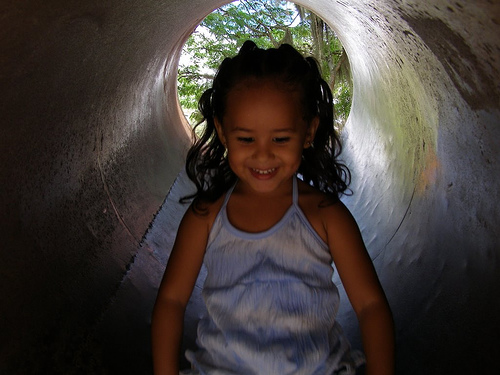

In [0]:
Image.open(test[0])

In [0]:
print(test_img_file[images+'2654514044_a70a6e2c21.jpg'])

['A brown dog running', 'A brown dog running over grass .', 'A brown dog with its front paws off the ground on a grassy surface near red and purple flowers .', 'A dog runs across a grassy lawn near some flowers .', 'A yellow dog is playing in a grassy area near flowers .']


PreProcessing Text file for LSTM Architecture

In [0]:
#adding start and end to text files
captions = []
for key, val in train_img_d.items():
  for i in val:
    captions.append('<start> '+ i + ' <end>')

In [0]:
captions[2]

'<start> Two children sit inside a play area . <end>'

In [0]:
print(captions[2])
c = [i.split() for i in captions[2]]
print(c)

<start> Two children sit inside a play area . <end>
[['<'], ['s'], ['t'], ['a'], ['r'], ['t'], ['>'], [], ['T'], ['w'], ['o'], [], ['c'], ['h'], ['i'], ['l'], ['d'], ['r'], ['e'], ['n'], [], ['s'], ['i'], ['t'], [], ['i'], ['n'], ['s'], ['i'], ['d'], ['e'], [], ['a'], [], ['p'], ['l'], ['a'], ['y'], [], ['a'], ['r'], ['e'], ['a'], [], ['.'], [], ['<'], ['e'], ['n'], ['d'], ['>']]


In [0]:
word = [i.split() for i in captions]

In [0]:
word[2]

['<start>',
 'Two',
 'children',
 'sit',
 'inside',
 'a',
 'play',
 'area',
 '.',
 '<end>']

In [0]:
uniq = []
for i in word:
  uniq.extend(i)

In [0]:
uniq[2]

'babies'

In [0]:
unique = list(set(uniq))

In [0]:
import pickle
with open('image_sequence.p','wb') as txt_file:
  pickle.dump(unique,txt_file)

In [0]:
import pickle
unique = pickle.load(open('/content/driver/My Drive/image_sequence (2).p','rb'))

In [0]:
for i in range(10):
  print(unique[i])

patchy
bmx
Miami
on-lookers
covers
skatepark
picture
equpitment
gate
bandmates


In [0]:
# assign unique words to index and viceversa 
word_2_index = {val:index for index, val in enumerate(unique) }

In [0]:
word_2_index['<start>']

5216

In [0]:
index_2_word = {index: val for index, val in enumerate(unique)}

In [0]:
index_2_word[5216]

'<start>'

In [0]:
max_len = 0
for i in captions:
  c = i.split()
  if len(c) > max_len:
    max_len = len(c)

In [0]:
max_len

40

In [0]:
print(len(unique),max_len)

8256 40


In [0]:
vocab_size = len(unique)

In [0]:
file_1  = open('flickr_train.txt','w')
file_1.write('image_id\tcaptions\n')

18

In [0]:
for key, val in train_img_d.items():
  for i in val:
    file_1.write(key[len(images):] + "\t" + " <start> " + i + " <end> " + "\n" ) 
file_1.close()

In [0]:
import pandas as pd

In [0]:
df = pd.read_csv('flickr_train.txt',delimiter='\t')

In [0]:
df

image_id                                           captions
0      2234910971_80e0325918.jpg   <start> Two people are walking in a desert . ...
1      2234910971_80e0325918.jpg   <start> Two people are walking through the sa...
2      2234910971_80e0325918.jpg   <start> Two people , one with a black jacket ...
3      2234910971_80e0325918.jpg   <start> two people walking along a huge deser...
4      2234910971_80e0325918.jpg   <start> Two people walk out onto the desert s...
...                          ...                                                ...
29995  3280672302_2967177653.jpg   <start> a boy carries a teenager on his back ...
29996  3280672302_2967177653.jpg   <start> A boy struggles to carry a girl on hi...
29997  3280672302_2967177653.jpg   <start> A person wearing a black shirt is get...
29998  3280672302_2967177653.jpg   <start> A teenage boy gives another teenage b...
29999  3280672302_2967177653.jpg   <start> The boy is carrying the other boy . <...

[30000 rows x 2 columns]

In [0]:
caps = [ i for i in df['captions']]
image_id = [i for i in df['image_id']]

In [0]:
len(caps) , len(image_id)

(30000, 30000)

In [0]:
caps[-1]

' <start> The boy is carrying the other boy . <end> '

In [0]:
caps[-1], image_id[-1]

(' <start> The boy is carrying the other boy . <end> ',
 '3280672302_2967177653.jpg')

In [0]:
a = caps[-1]

In [0]:
a.split()

['<start>',
 'The',
 'boy',
 'is',
 'carrying',
 'the',
 'other',
 'boy',
 '.',
 '<end>']

In [0]:
for i in a.split():
  print(i , ' => ' , word_2_index[i])

<start>  =>  5216
The  =>  4410
boy  =>  5637
is  =>  6392
carrying  =>  6079
the  =>  4079
other  =>  6598
boy  =>  5637
.  =>  7450
<end>  =>  6229


In [0]:
samples_per_epoch = 0
for i in caps:
  samples_per_epoch += len(i.split())-1

In [0]:
samples_per_epoch

383454

Image Captioning Generator

In [0]:
from keras.preprocessing import sequence

In [0]:
def data_generator(batch_size = 32):
        partial_caps = []
        next_words = []
        images = []
        df = pd.read_csv('flickr_train.txt', delimiter='\t')
        df = df.sample(frac=1)
        iter = df.iterrows()
        c = []
        imgs = []
        for i in range(df.shape[0]):
            x = next(iter)
            c.append(x[1][1])
            imgs.append(x[1][0])
        count = 0
        while True:
            for j, text in enumerate(c):
                current_image = train_img_file[imgs[j]]
                for i in range(len(text.split())-1):
                    count+=1                
                    partial = [word_2_index[txt] for txt in text.split()[:i+1]]
                    partial_caps.append(partial)                  
                    # Initializing with zeros to create a one-hot encoding matrix
                    # This is what we have to predict
                    # Hence initializing it with vocab_size length
                    n = np.zeros(vocab_size)
                    # Setting the next word to 1 in the one-hot encoded matrix
                    n[word_2_index[text.split()[i+1]]] = 1
                    next_words.append(n)                  
                    images.append(current_image)
                    if count>=batch_size:
                        next_words = np.asarray(next_words)
                        images = np.asarray(images)
                        partial_caps = sequence.pad_sequences(partial_caps, maxlen=max_len, padding='post')
                        yield [[images, partial_caps], next_words]
                        partial_caps = []
                        next_words = []
                        images = []
                        count = 0

MODEL CREATION

In [0]:
from keras.models import Sequential

Using TensorFlow backend.


In [0]:
from keras.layers import Dense, Activation, Dropout, RepeatVector, Concatenate, concatenate, add, Input, Embedding, TimeDistributed, Bidirectional, LSTM, BatchNormalization

In [0]:
from keras.models import Model

In [0]:
embedding_size = 300

In [0]:
image_model = Sequential()
image_model.add(Dense(embedding_size, input_shape=(2048,), activation='relu'))
image_model.add(RepeatVector(max_len))

lang_model = Sequential()
lang_model.add(Embedding(vocab_size,embedding_size , input_length=max_len))
lang_model.add(Bidirectional(LSTM(256,return_sequences=True)))
lang_model.add(Dropout(0.5))
lang_model.add(BatchNormalization())
lang_model.add(TimeDistributed(Dense(embedding_size)))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
conca = Concatenate()([image_model.output, lang_model.output])
x = Dropout(0.5)(conca)
x = BatchNormalization()(x)
x = Bidirectional(LSTM(1000,return_sequences=False))(x)
x = Dense(vocab_size)(x)
x = Activation('softmax')(x)

NameError: ignored

In [0]:
model = Model(inputs=[image_model.input, lang_model.input], outputs = x)

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [0]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
embedding_1_input (InputLayer)  (None, 40)           0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 40, 300)      2476800     embedding_1_input[0][0]          
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 40, 512)      1140736     embedding_1[0][0]                
__________________________________________________________________________________________________
dense_1_input (InputLayer)      (None, 2048)         0                                            
____________________________________________________________________________________________

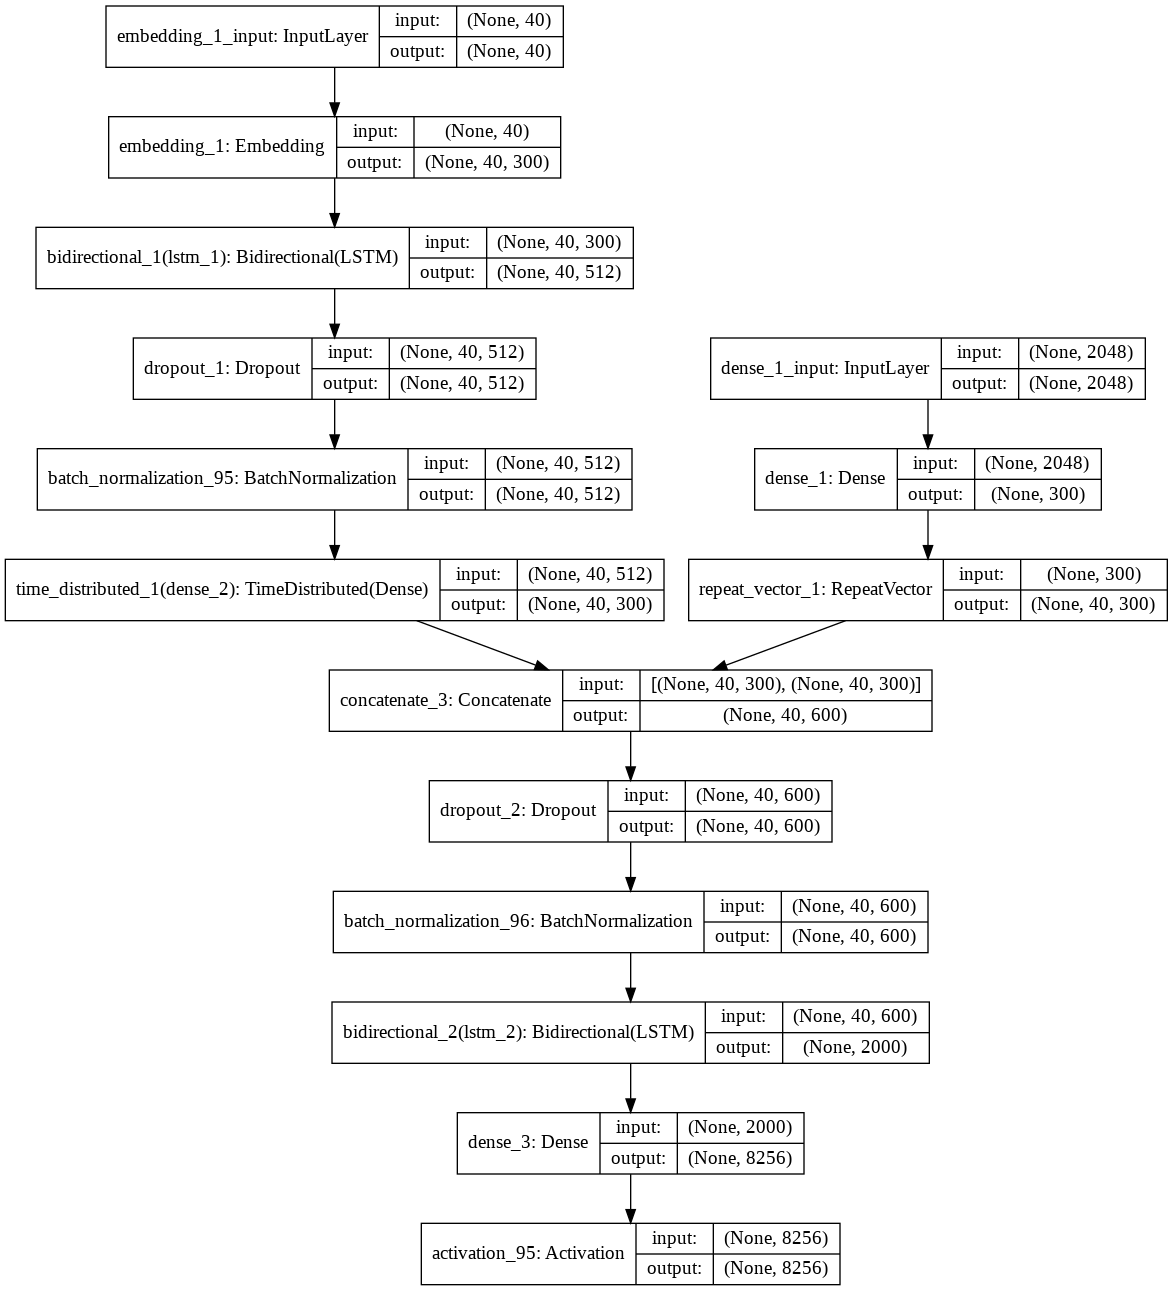

In [0]:
from keras.utils import plot_model
plot_model(model,show_shapes=True, to_file = 'model.png')

In [0]:
model.load_weights('/content/driver/My Drive/second_model_weights_47931_82.h5')

In [0]:
def greed_method(image_file):
  start_word = ["<start>"]
  while 1:
        captions_index = [word_2_index[i] for i in start_word]
        pad = sequence.pad_sequences([captions_index], maxlen=max_len, padding='post')
        img = test_img_file[image_file]
        preds = model.predict([np.array([img]), np.array(pad)])
        max_preds = np.argmax(preds[0])
        pred_words = index_2_word[max_preds]
        start_word.append(pred_words)
        if  pred_words == "<end>" or len(start_word) > max_len:
          break
  return ' '.join(start_word[1:-1])
     

In [0]:
def greed_method_train(image_file):
  start_word = ["<start>"]
  while 1:
        captions_index = [word_2_index[i] for i in start_word]
        pad = sequence.pad_sequences([captions_index], maxlen=max_len, padding='post')
        img = train_img_file[image_file]
        preds = model.predict([np.array([img]), np.array(pad)])
        max_preds = np.argmax(preds[0])
        pred_words = index_2_word[max_preds]
        start_word.append(pred_words)
        if  pred_words == "<end>" or len(start_word) > max_len:
          break
  return ' '.join(start_word[1:-1])

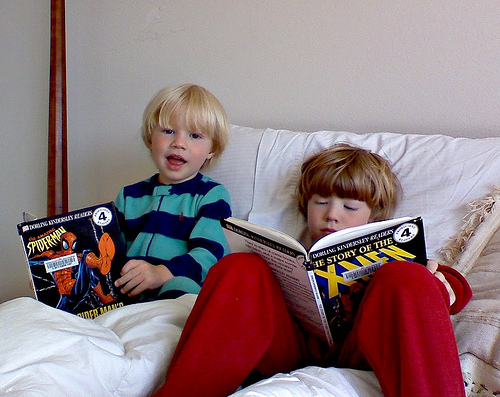

In [0]:
Image.open(valid[1])

In [0]:
greed_method_valid('3549277110_24d4064ccd.jpg')

'A young asian girl with a black shirt and blue jeans is holding some looking out .'

In [0]:
def greed_method_valid(image_file):
  start_word = ["<start>"]
  while 1:
        captions_index = [word_2_index[i] for i in start_word]
        pad = sequence.pad_sequences([captions_index], maxlen=max_len, padding='post')
        img = valid_img_file[image_file]
        preds = model.predict([np.array([img]), np.array(pad)])
        max_preds = np.argmax(preds[0])
        pred_words = index_2_word[max_preds]
        start_word.append(pred_words)
        if  pred_words == "<end>" or len(start_word) > max_len:
          break
  return ' '.join(start_word[1:-1])

In [0]:
from random import randint

In [0]:
def images_1(test):
  c = randint(0,999)
  #print(test[c])
  d = test[c]
  cc = d[len(images)-1:]
  cc = cc.split('/')
  cc = cc[1]
  print(greed_method(cc),'\n')
  return Image.open(test[c])

In [0]:
def images_1_train(train):
  c = randint(999,1999)
  #print(test[c])
  d = train[c]
  cc = d[len(images)-1:]
  cc = cc.split('/')
  cc = cc[1]
  print(greed_method_train(cc),'\n')
  return Image.open(train[c])

In [0]:
greed_method('3255482333_5bcee79f7e.jpg')

'A skier lying down in front of a red sky moving over a snowy , wooded area .'

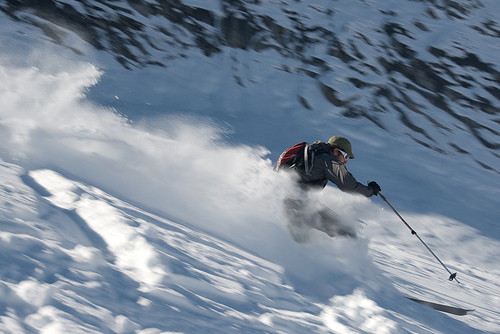

In [0]:
file = images+'3255482333_5bcee79f7e.jpg'
Image.open(file)

In [0]:
greed_method('3218480482_66af7587c8.jpg')

'Two young men take a rail at the ball .'

A young girl pulls a large child with short brown hair in a field of mountains . 



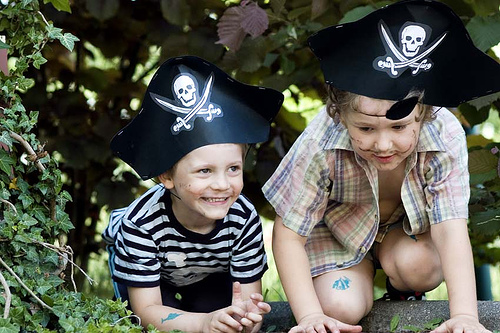

In [0]:
images_1(test)

The lady is performing a huge jump . 



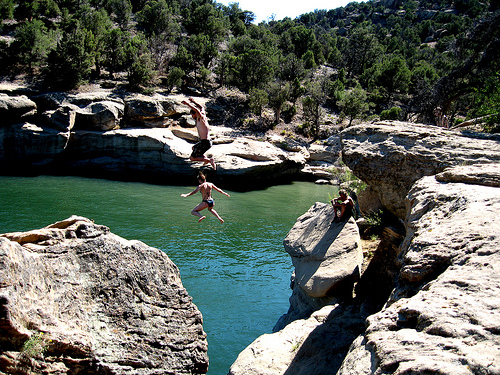

In [0]:
images_1_train(train)

In [0]:
def images_train_2(val):
  #c = randint(0,999)
  #print(test[c])
  c  = int(val)
  d = train[c]
  cc = d[len(images)-1:]
  cc = cc.split('/')
  cc = cc[1]
  #print(greed_method_train(cc),'\n')
  return train[c], greed_method_train(cc)

In [0]:
def images_valid(val):
  #c = randint(0,999)
  #print(test[c])
  c  = int(val)
  d = valid[c]
  cc = d[len(images)-1:]
  cc = cc.split('/')
  cc = cc[1]
  #print(greed_method_train(cc),'\n')
  return valid[c], greed_method_valid(cc)

In [0]:
from tqdm import tqdm

In [0]:
e = []
f = []
for i in tqdm(range(999)):
  c, b = images_valid(i)
  e.append(c)
  f.append(b)

In [0]:
text_search = pd.DataFrame({
    'image_id' : e,
    'captions' : f
})

In [0]:
datafile =  pd.DataFrame(text_search['image_id'])

In [0]:
datafile2 = pd.DataFrame(text_search['captions'])

In [0]:
datafile.to_csv('file_search_image_id.csv',index=False)
datafile2.to_csv('file_search_captions.csv',index=False)

In [0]:
c = pd.concat([datafile,datafile2],axis=1,sort=False)

In [0]:
c.to_csv('file_search_final.csv',index=False)
c.to_csv('file_search_final+txt.txt',index=False)

In [0]:
c['image_id'][1]

'/content/flickr8k_dataset/Flicker8k_Dataset/518251319_40e031e818.jpg'

In [0]:
import pandas as pd

In [0]:
final_search = pd.read_csv('/content/final_search_text.csv')

In [0]:
final_search['image_id'][1]

'/kaggle/input/flickr8k/flickr_data/Flickr_Data/Images/3421131122_2e4bde661e.jpg'

In [0]:
final_search['image_id']= final_search['image_id'].str.replace('/kaggle/input/flickr8k/flickr_data/Flickr_Data/Images/','/content/flickr8k_dataset/Flicker8k_Dataset/',case=False)

In [0]:
final_search.head()

image_id                                           captions
0  /content/flickr8k_dataset/Flicker8k_Dataset/24...  A brown and white dog runs in the grass and ju...
1  /content/flickr8k_dataset/Flicker8k_Dataset/34...             Two people are racing across a river .
2  /content/flickr8k_dataset/Flicker8k_Dataset/30...          A rock climber is climbing a rock cliff .
3  /content/flickr8k_dataset/Flicker8k_Dataset/22...  A man and woman walk together and sitting on a...
4  /content/flickr8k_dataset/Flicker8k_Dataset/51...  A black puppy is standing inside a small , bro...

A rock climber is climbing a rock cliff .


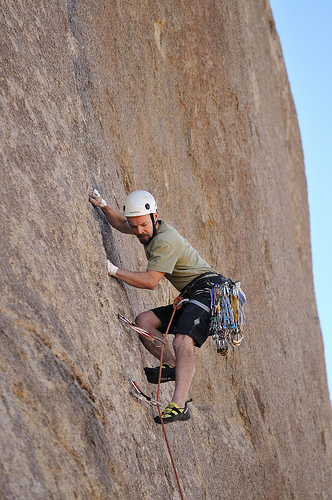

In [0]:
print(final_search['captions'][2])
Image.open(final_search['image_id'][2])

In [0]:
connect = str(input())

rock climbing


In [0]:
conf = final_search.loc[final_search['captions'].str.contains(connect)]

In [0]:
conf

image_id                                           captions
98    /content/flickr8k_dataset/Flicker8k_Dataset/95...                           A man is rock climbing .
221   /content/flickr8k_dataset/Flicker8k_Dataset/27...                    A man in red is rock climbing .
952   /content/flickr8k_dataset/Flicker8k_Dataset/31...                           A man is rock climbing .
1343  /content/flickr8k_dataset/Flicker8k_Dataset/35...  A person is rock climbing at the view of a mou...
1787  /content/flickr8k_dataset/Flicker8k_Dataset/97...  A man is rock climbing while the wind is attac...
1791  /content/flickr8k_dataset/Flicker8k_Dataset/23...    A man is rock climbing at the edge of a cliff .
1823  /content/flickr8k_dataset/Flicker8k_Dataset/47...  A lady in a red jacket and tan pants is rock c...
2037  /content/flickr8k_dataset/Flicker8k_Dataset/37...  A girl in pink dress and a jean shirt is rock ...
2323  /content/flickr8k_dataset/Flicker8k_Dataset/21...  A person wearing a red helmet is climbing a ro...
2332  /content/flickr8k_dataset/Flicker8k_Dataset/24...                           A man is rock climbing .
2421  /content/flickr8k_dataset/Flicker8k_Dataset/36...                   A person in blue rock climbing .
2529  /content/flickr8k_dataset/Flicker8k_Dataset/20...  A man is rock climbing with a mountain in the ...
2812  /content/flickr8k_dataset/Flicker8k_Dataset/35...  A person is rock climbing at the edge of a cli...
3591  /content/flickr8k_dataset/Flicker8k_Dataset/31...  A person is rock climbing at the top of a larg...
4117  /content/flickr8k_dataset/Flicker8k_Dataset/29...                           A man is rock climbing .
4156  /content/flickr8k_dataset/Flicker8k_Dataset/30...                           A man is rock climbing .
4571  /content/flickr8k_dataset/Flicker8k_Dataset/44...  A man is rock climbing while the wind blows th...
5519  /content/flickr8k_dataset/Flicker8k_Dataset/25...           A man is rock climbing at a cliff edge .
5531  /content/flickr8k_dataset/Flicker8k_Dataset/11...  A woman with a helmet and a plaid helmet rock ...

In [0]:
cb = conf['image_id']

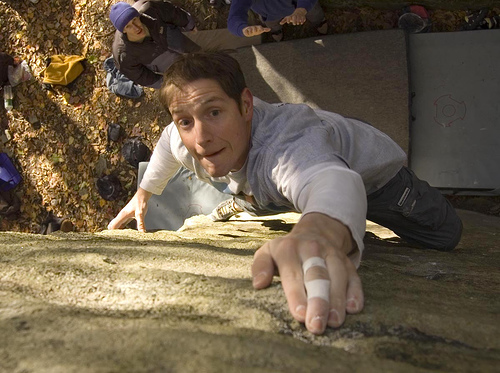

In [0]:
Image.open(cb1[1])

In [0]:
cb1 = list(cb)
cb2 = ' '.join(cb1)

In [0]:
cb1

['/content/flickr8k_dataset/Flicker8k_Dataset/950273886_88c324e663.jpg',
 '/content/flickr8k_dataset/Flicker8k_Dataset/272283076_2d4aa1d5cf.jpg',
 '/content/flickr8k_dataset/Flicker8k_Dataset/314904143_5a216a192b.jpg',
 '/content/flickr8k_dataset/Flicker8k_Dataset/3537218226_478d2e4f26.jpg',
 '/content/flickr8k_dataset/Flicker8k_Dataset/976392326_082dafc3c5.jpg',
 '/content/flickr8k_dataset/Flicker8k_Dataset/236095034_c983bdfbbf.jpg',
 '/content/flickr8k_dataset/Flicker8k_Dataset/478208896_90e7187b64.jpg',
 '/content/flickr8k_dataset/Flicker8k_Dataset/3703035378_c6034cac51.jpg',
 '/content/flickr8k_dataset/Flicker8k_Dataset/2127207912_9298824e66.jpg',
 '/content/flickr8k_dataset/Flicker8k_Dataset/247097023_e656d5854d.jpg',
 '/content/flickr8k_dataset/Flicker8k_Dataset/3699763582_f28c5130dd.jpg',
 '/content/flickr8k_dataset/Flicker8k_Dataset/2089539651_9e518ec7de.jpg',
 '/content/flickr8k_dataset/Flicker8k_Dataset/3565654691_22b97d3994.jpg',
 '/content/flickr8k_dataset/Flicker8k_Dataset

In [0]:
import matplotlib.image as img

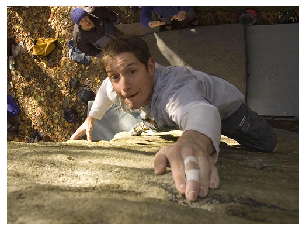

In [0]:
build = img.imread(cb1[1])
plt.axis('off')
plt.imshow(build)

In [0]:
len(conf)

19

FileNotFoundError: ignored

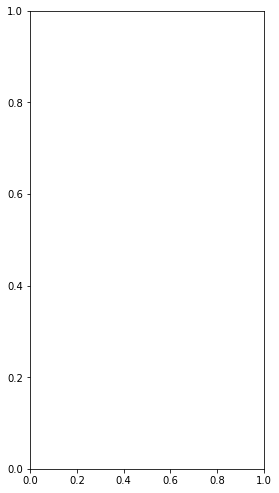

In [0]:
n = len(conf)
n = randint(1,n)
plt.figure(figsize=(150,150))

for i in range(n):
  plt.subplot(n,30,i+1)
  build = img.imread(cb1[i])
  plt.axis('off')
  plt.imshow(build)
  plt.axis('off')
plt.show()     

In [0]:
def search_text(text):
  conf = final_search.loc[final_search['captions'].str.contains(text)]
  cb = conf['image_id'] 
  cb1 = list(cb)
  g = len(conf)
  n = randint(1,g)
  plt.figure(figsize=(150,150))

  for i in range(n):
    plt.subplot(n,30,i+1)
    build = img.imread(cb1[i])
    plt.axis('off')
    plt.imshow(build)
    plt.axis('off')
  return plt.show()
  
  

In [0]:
text = input(str())

Frisbee


FileNotFoundError: ignored

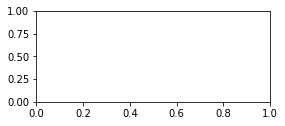

In [0]:
search_text(text)

In [0]:
test_pd = pd.read_csv('/content/final_search_text.csv')
train_pd = pd.read_csv('/content/final_searching_test.csv')
valid_pd = pd.read_csv('/content/final_searching_valid.csv')

In [0]:
pieces = {'x': test_pd , 'y': train_pd , 'z': valid_pd}
#result = pd.concat(pieces)

In [0]:
result_search = pd.concat(pieces)

In [0]:
result_search.to_csv('final_full.csv',index=False)

In [0]:
final_full = pd.read_csv('final_full.csv')

image_id                                           captions
0     /kaggle/input/flickr8k/flickr_data/Flickr_Data...          A rock climber is climbing a rock cliff .
1     /kaggle/input/flickr8k/flickr_data/Flickr_Data...  A man and woman walk together and sitting on a...
2     /kaggle/input/flickr8k/flickr_data/Flickr_Data...  A black puppy is standing inside a small , bro...
3     /kaggle/input/flickr8k/flickr_data/Flickr_Data...                A man and woman are in a race car .
4     /kaggle/input/flickr8k/flickr_data/Flickr_Data...  A football player is tackling a player on the ...
...                                                 ...                                                ...
7990  /kaggle/input/flickr8k/flickr_data/Flickr_Data...  A man in a red jacket skis past a mountain sce...
7991  /kaggle/input/flickr8k/flickr_data/Flickr_Data...   a group of children playing a game in the pool .
7992  /kaggle/input/flickr8k/flickr_data/Flickr_Data...  A mountain climber is descending a snow covere...
7993  /kaggle/input/flickr8k/flickr_data/Flickr_Data...               a horse mascot is in a large dress .
7994  /kaggle/input/flickr8k/flickr_data/Flickr_Data...  A girl in a yellow shirt is walking next to a ...

[7995 rows x 2 columns]

In [0]:
result_search['image_id']= result_search['image_id'].str.replace('/kaggle/input/flickr8k/flickr_data/Flickr_Data/Images/','/content/flickr8k_dataset/Flicker8k_Dataset/',case=False)

In [0]:
def search_text(text):
  conf = result_search.loc[result_search['captions'].str.contains(text)]
  cb = conf['image_id'] 
  cb1 = list(cb)
  g = len(conf)
  n = randint(1,g)
  plt.figure(figsize=(150,150))

  for i in range(n):
    plt.subplot(n,30,i+1)
    build = img.imread(cb1[i])
    plt.axis('off')
    plt.imshow(build)
    plt.axis('off')
  return plt.show()

In [0]:
text = input(str())
search_text(text)

children playing
